In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# What is Time Series Data?

Important to consider progression of time
> - Is the temporal information a key focus of the data?  

## Examples

- Stock prices
- Temperature over the year
- Atmoshperic changes over the course of decades

## Loading in time series

In [2]:
# Load and display
df = pd.read_csv("min_temp.csv")
display(df.head(10))
display(df.info())

,Date,Daily_min
0,1/1/81,20.7
1,2/1/81,17.9
2,3/1/81,18.8
3,4/1/81,14.6
4,5/1/81,15.8
5,6/1/81,15.8
6,7/1/81,15.8
7,8/1/81,17.4
8,9/1/81,21.8
9,10/1/81,20.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
Date         3650 non-null object
Daily_min    3650 non-null float64
dtypes: float64(1), object(1)
memory usage: 57.1+ KB


None

## Make data readable as a datetime

In [3]:
# Creating a proper datetime using the string formatting
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
# Make the temporal data as the focus
df = df.set_index('Date')

In [4]:
display(df.head(10))
display(df.info())

,Daily_min
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
1981-01-07,15.8
1981-01-08,17.4
1981-01-09,21.8


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
Daily_min    3650 non-null float64
dtypes: float64(1)
memory usage: 57.0 KB


None

## Slicing time series data

In [5]:
after_1990 = df['1990':]
display(after_1990.head())

,Daily_min
Date,
1990-01-01,14.8
1990-01-02,13.3
1990-01-03,15.6
1990-01-04,14.5
1990-01-05,14.3


## Follow-up: Why should we make the date as the index?

# Resampling

Converting the time series into a particular frequency

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling

## Downsampling

- resample at a lower rate
- may loose information
- more computationally efficient

### Example

In [6]:
# Average out so we have monthly means (compared to using days)
monthly = df.resample('MS')
month_mean = monthly.mean()

In [7]:
month_mean.head(10)

,Daily_min
Date,
1981-01-01,17.712903
1981-02-01,17.678571
1981-03-01,13.500000
1981-04-01,12.356667
1981-05-01,9.490323
1981-06-01,7.306667
1981-07-01,7.577419
1981-08-01,7.238710
1981-09-01,10.143333


## Upsampling

- resample at a higher rate
- should keep information

### Example

In [8]:
# Data to every 12hours but only fill the parts known (blank otherwise)
bidaily = df.resample('12H').asfreq()
bidaily.head(10)

,Daily_min
Date,
1981-01-01 00:00:00,20.7
1981-01-01 12:00:00,NaN
1981-01-02 00:00:00,17.9
1981-01-02 12:00:00,NaN
1981-01-03 00:00:00,18.8
1981-01-03 12:00:00,NaN
1981-01-04 00:00:00,14.6
1981-01-04 12:00:00,NaN
1981-01-05 00:00:00,15.8


In [9]:
# Interpolate to every 12hours but fill the parts unknown (no blanks)
bidaily = df.resample('12H').ffill()
bidaily.head(10)

,Daily_min
Date,
1981-01-01 00:00:00,20.7
1981-01-01 12:00:00,20.7
1981-01-02 00:00:00,17.9
1981-01-02 12:00:00,17.9
1981-01-03 00:00:00,18.8
1981-01-03 12:00:00,18.8
1981-01-04 00:00:00,14.6
1981-01-04 12:00:00,14.6
1981-01-05 00:00:00,15.8


In [10]:
hourly = df.resample('1H').ffill()
hourly.head(30)

,Daily_min
Date,
1981-01-01 00:00:00,20.7
1981-01-01 01:00:00,20.7
1981-01-01 02:00:00,20.7
1981-01-01 03:00:00,20.7
1981-01-01 04:00:00,20.7
1981-01-01 05:00:00,20.7
1981-01-01 06:00:00,20.7
1981-01-01 07:00:00,20.7
1981-01-01 08:00:00,20.7


# Visualizing Time Series

## Showing Changes Over Time

Can identify patterns and trends with visualizations

In [14]:
# New York Stock Exchange average monthly returns [1961-1966] from curriculum
nyse = pd.read_csv("NYSE_monthly.csv")
col_name= 'Month'
nyse[col_name] = pd.to_datetime(nyse[col_name])
nyse.set_index(col_name, inplace=True)

display(nyse.head(10))
display(nyse.info())

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042
1961-06-01,-0.042
1961-07-01,0.011
1961-08-01,0.021
1961-09-01,-0.030


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 1961-01-01 to 1966-12-01
Data columns (total 1 columns):
monthly_return    72 non-null float64
dtypes: float64(1)
memory usage: 1.1 KB


None

### Line Plot

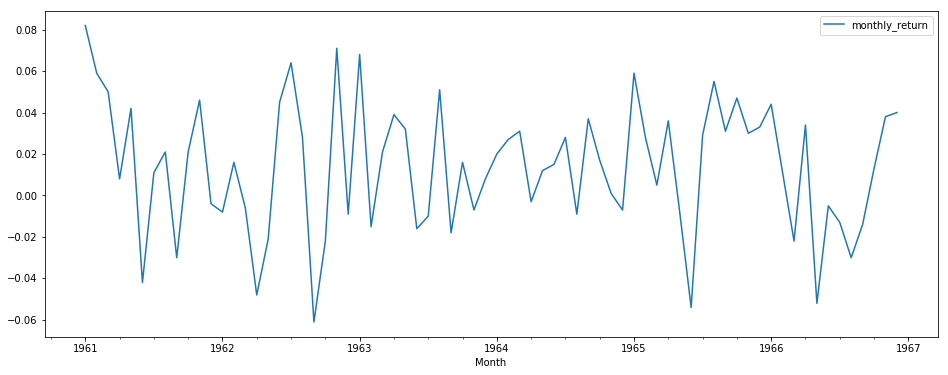

In [15]:
nyse.plot(figsize = (16,6))
import matplotlib.pyplot as plt
plt.show()

### Dot Plot

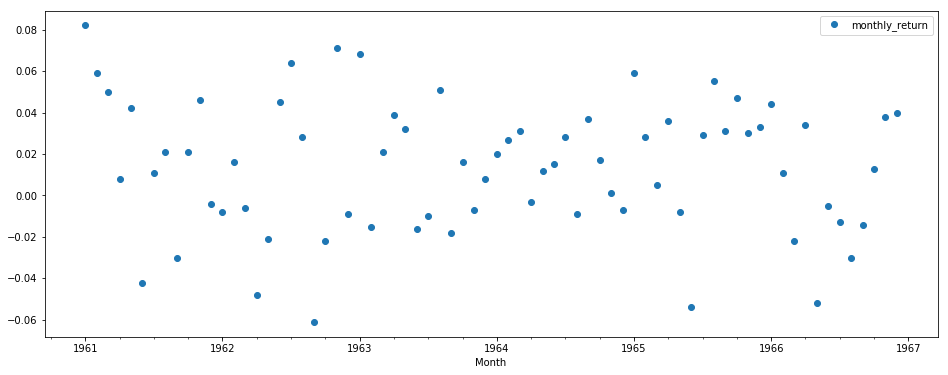

In [23]:
nyse.plot(figsize = (16,6), style = "o")
import matplotlib.pyplot as plt
plt.show()

### Question time: Dot vs Line Plots

Note the difference between this and the line plot

When would you want a dot vs a line plot?

### Grouping Plots

What if we wanted to look at year-to-year (e.g., temperature throughout many years)

Couple options to choose from

### Example all separated annual (from curriculum)

In [24]:
# Annual Frequency
year_groups = nyse.groupby(pd.Grouper(freq ='A'))

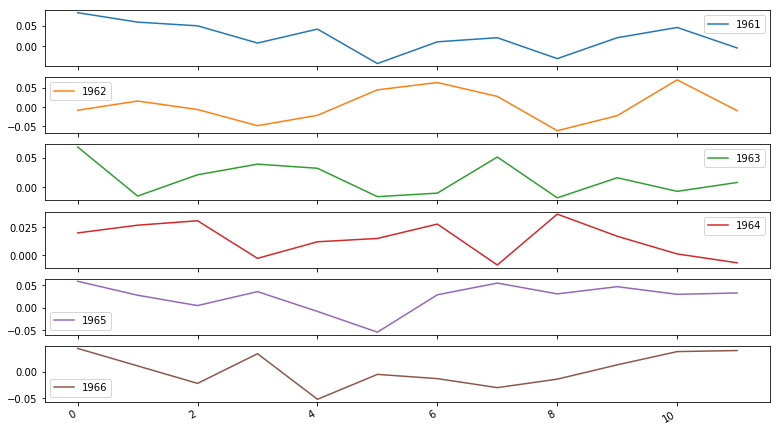

In [25]:
#Create a new DataFrame and store yearly values in columns 
nyse_annual = pd.DataFrame()

for yr, group in year_groups:
    nyse_annual[yr.year] = group.values.ravel()
    
# Plot the yearly groups as subplots
nyse_annual.plot(figsize = (13,8), subplots=True, legend=True)
plt.show()

### Example all together annual (from curriculum)

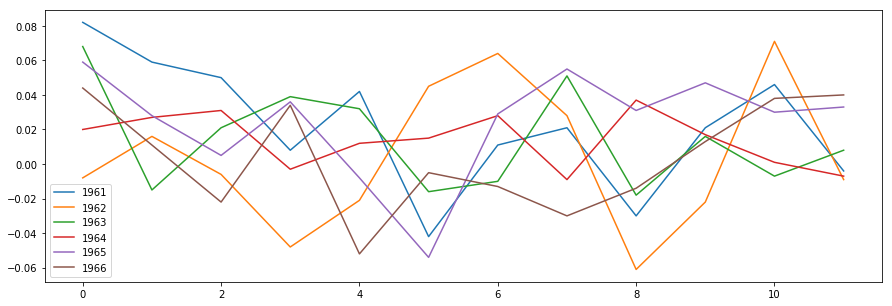

In [26]:
# Plot overlapping yearly groups 
nyse_annual.plot(figsize = (15,5), subplots=False, legend=True)
plt.show()

## Showing Distributions

### Histogram

### Density

### Box Plot

### Heat Maps

# Types of Trends

# Removing Trends

# Time Series Decomposition